# Lecture 6 - CNNs and Deep Q Learning

provided by [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a>
        <ul>
            <li>1.1. <a href="#1.1.-DQNs-in-Atari"> DQNs in Atari</a></li>
        </ul>
    </li>
    <li>2. <a href="#2.-Deep-Q-Learning-with-Value-Function-Approximation">Deep Q-Learning with Value Function Approximation</a></li>
    <li>3. <a href="#3.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

Why do we want to use deep learning networks to do function approximation?

They are good for modeling high dimensional spaces!

## 1.1. DQNs in Atari

We use a CNN to model a $Q$-function. The CNN would learn the $Q(s, a)$ matrix from a stack of 4 frames from the game. The output is $Q(s, a)$ or roughly 18 joystick positions and reward was the change in score for steps.

# 2. Deep Q-Learning with Value Function Approximation

Q-Learning for VFA faced 2 big issues:
* correlations betweeen samples (one tuple of state, action reward, final state) is most likely highly correlated with the following tuple 
* non-stationary targets (everytime you update your $Q$-function the targets or ideal q-values change)

__Deep Q-learning (DQN)__ addresses this and introduces 2 new ideas:
* __Experience replay__
* __Fixed Q-targets__

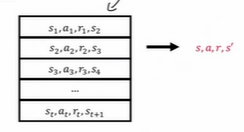 <br>
_Figure 1. Replay buffer._

A __replay buffer__ of state, action, reward, final state tuples are stored. Each tuple can be reused. You can just build out this replay buffer by exploring the environment. Then you can sample tuples from here to compute a target value and update the network weights.

$$
\Delta \textbf{w} = \alpha(r + \gamma \underset{a'}{max}\hat{Q}(s', a'; \textbf{w}) - \hat{Q}(s, a; \textbf{w})) \nabla_{\textbf{w}}\hat{Q}(s, a; \textbf{w})
$$

DQNs also introduced the idea of __fixed target weights__. Basically the CNN that would compute the target values would not have the same weights as the one being updated (it would lag behind).

Succeeding in applying Deep RL in Atari led to lots of excitement in using deep learning in RL.

Some landmark papers in deep RL include:
* Double DQN
* Prioritized Replay
* Dueling DQN

__Double DQN__ is basically Double Q-Learning but for DQNs. It separates how we compute our target values and how we update our weights.

__Prioritized Experience Replay__ gives priority to certain tuples in the replay buffer that yield high DQN error.

$$
p_{i} = |r + \gamma \underset{a'}{max}Q(s_{i + 1}, a'; \textbf{w}^{-}) - Q(s_{i}, a_{i}; \textbf{w})| \hspace{1em} (Eq.~1)\\
$$

Where $\textbf{w}^{-}$ is the notation for the weights of the target network and $i$ is the $i$-th tuple of experience $(s_{i}, a_{i}, r_{i}, s_{i + 1})$. 

Alongside your experience replay buffer, you would have a priority vector (one slot for each tuple). Then you can calculate some stochastic prioritization:

$$
P(i) = \frac{p_{i}^{\alpha}}{\sum_{k}p_{k}^{\alpha}} \hspace{1em} (Eq.~2)\\
$$

__Dueling DQN__ is a DQN but it also estimates a value function, and the advantage function $A^{\pi}(s, a) = Q^{\pi}(s, a) - V^{\pi}(s)$ and derives the $q$-function from it.

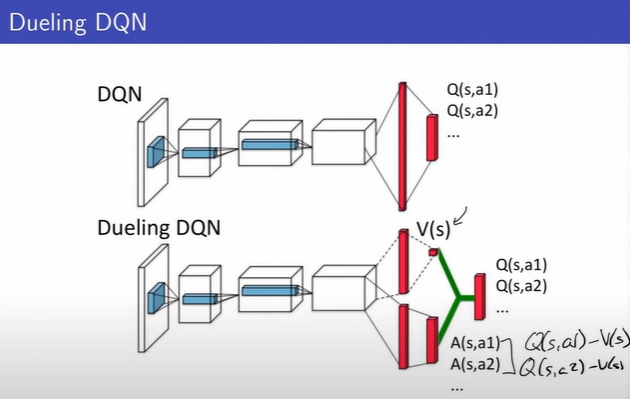 <br>
_Figure 2. Dueling DQN._

# 3. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)
- [Course Website](http://web.stanford.edu/class/cs234/index.html)

This is a series of 15 lectures provided by Stanford.
